# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "0a3f547761154cd89b5616aa3f34603e9902d002"
connection.set_access_token(API_TOKEN)

Access token is valid.


#### NOTE: Before creating or executing the strategy, ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).![Reference](https://algobulls.github.io/pyalgotrading/python_build/imgs_v2/python_build_Oauth_successful.png)

# Strategy Creation

## Import Strategy from pyaglostrategypool

In [5]:
! wget -O reverse_rsi_crossover_us.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/reverse_rsi_crossover.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' reverse_rsi_crossover_us.py

--2023-12-01 22:23:23--  https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/reverse_rsi_crossover.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3229 (3.2K) [text/plain]
Saving to: ‘reverse_rsi_crossover_us.py’

reverse_rsi_crossov 100%[===================>]   3.15K  --.-KB/s    in 0s      

2023-12-01 22:23:23 (31.9 MB/s) - ‘reverse_rsi_crossover_us.py’ saved [3229/3229]



In [6]:
from reverse_rsi_crossover_us import ReverseRSICrossover as strategy_cls

In [7]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 134225,
 'strategyId': '961da4429c93499abdcff2e1c35583f4'}

In [8]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [9]:
instrument = connection.search_instrument('NFLX', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:NFLX'

## Setup Parameters

In [10]:
parameters = {
  'TIME_PERIOD': 10,
  'OVERBOUGHT_VALUE': 65,
    'OVERSOLD_VALUE': 35
}

In [11]:
initial_virtual_funds = 6000     # in dollars

## Backtesting

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [12]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400', 
    end='2023-07-31 15:30 -0400', 
    instrument='NASDAQ:NFLX', 
    lots=4,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds
)


Starting the strategy 'Reverse RSI' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════════════════════════════════════════════╕
│ Config                  │ Value                                                             │
╞═════════════════════════╪═══════════════════════════════════════════════════════════════════╡
│ Strategy Name           │ Reverse RSI                                                       │
├─────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                                       │
├─────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:NFLX']                                                   │
├─────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Quantity/Lots           │ 4                                               

### Status

In [13]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [14]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (5)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]


----------------------------------------
Faced an error while fetching logs.
----------------------------------------



In [15]:
print(logs)

[2023-12-01 22:24:10] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-12-01 22:24:10] Sanity checks on cfg successful.
[2023-12-01 22:24:10] Currency set to "USD"
[2023-12-01 22:24:10] Setting up broker connection...
[2023-12-01 22:24:11] Starting ALPACAV2 in PAPER mode...
[2023-12-01 22:24:12] Broker connection has been setup successfully.
[2023-12-01 22:24:12] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '6000.00'
[2023-12-01 22:24:12] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-12-01 22:24:12] Welcome ALGOBULLS VIRTUAL USER!
[2023-12-01 22:24:12] Reading strategy...
[2023-12-01 22:24:12] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  

### Stop

In [16]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Fail.
Forbidden: Content: b'{"message":"Strategy execution is already in the STOPPING state."}' | Raw: b''


## Profit and Loss Reports

In [17]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NASDAQ,NFLX,2021-08-03 12:30:00-04:00,BUY,4,$,511.87,,2021-08-03 15:30:00-04:00,SELL,4,$,511.87,,0.00,0.00,0,0.00
1,NASDAQ,NFLX,2021-08-06 12:30:00-04:00,SELL,4,$,523.31,,2021-08-06 15:30:00-04:00,BUY,4,$,523.31,,0.00,0.00,0,0.00
2,NASDAQ,NFLX,2021-08-11 09:30:00-04:00,BUY,4,$,516.77,,2021-08-11 11:30:00-04:00,SELL,4,$,513.13,,-14.56,-14.56,0,-14.56
3,NASDAQ,NFLX,2021-08-13 09:30:00-04:00,BUY,4,$,512.64,,2021-08-13 15:30:00-04:00,SELL,4,$,517.34,,18.80,4.24,0,18.80
4,NASDAQ,NFLX,2021-08-18 09:30:00-04:00,SELL,4,$,520.00,,2021-08-18 10:30:00-04:00,BUY,4,$,521.79,,-7.16,-2.92,0,-7.16
5,NASDAQ,NFLX,2021-08-25 09:30:00-04:00,SELL,4,$,550.89,,2021-08-25 15:30:00-04:00,BUY,4,$,547.82,,12.28,9.36,0,12.28
6,NASDAQ,NFLX,2021-09-08 09:30:00-04:00,SELL,4,$,603.84,,2021-09-08 10:30:00-04:00,BUY,4,$,610.97,,-28.52,-19.16,0,-28.52
7,NASDAQ,NFLX,2021-09-08 11:30:00-04:00,SELL,4,$,603.42,,2021-09-08 15:30:00-04:00,BUY,4,$,597.33,,24.36,5.20,0,24.36
8,NASDAQ,NFLX,2021-09-16 09:30:00-04:00,BUY,4,$,584.30,,2021-09-16 15:30:00-04:00,SELL,4,$,579.81,,-17.96,-12.76,0,-17.96
9,NASDAQ,NFLX,2021-09-21 11:30:00-04:00,BUY,4,$,575.72,,2021-09-21 15:30:00-04:00,SELL,4,$,577.50,,7.12,-5.64,0,7.12


## Statistics Reports

### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-03
End Period          2023-07-28
Risk-Free Rate      0.0%
Time in Market      79.0%

Cumulative Return   -3.95%
CAGR﹪              -2.01%

Sharpe              -1.4
Prob. Sharpe Ratio  13.51%
Sortino             -1.94
Sortino/√2          -1.37
Omega               0.76

Max Drawdown        -5.59%
Longest DD Days     688

Gain/Pain Ratio     -0.25
Gain/Pain (1M)      -0.43

Payoff Ratio        1.12
Profit Factor       0.76
Common Sense Ratio  0.71
CPC Index           0.34
Tail Ratio          0.94
Outlier Win Ratio   5.33
Outlier Loss Ratio  3.41

MTD                 1.22%
3M                  0.9%
6M                  -0.13%
YTD                 -0.65%
1Y                  -0.04%
3Y (ann.)           -2.01%
5Y (ann.)           -2.01%
10Y (ann.)          -2.01%
All-time (ann.)     -2.01%

Avg. Drawdown       -1.99%
Avg. Drawdown Days  232
Recovery Factor     -0.71
Ulcer Index         0.04
Serenity Index    

### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-03
End Period                 2023-07-28
Risk-Free Rate             0.0%
Time in Market             79.0%

Cumulative Return          -3.95%
CAGR﹪                     -2.01%

Sharpe                     -1.4
Prob. Sharpe Ratio         13.51%
Smart Sharpe               -1.38
Sortino                    -1.94
Smart Sortino              -1.92
Sortino/√2                 -1.37
Smart Sortino/√2           -1.36
Omega                      0.76

Max Drawdown               -5.59%
Longest DD Days            688
Volatility (ann.)          4.31%
Calmar                     -0.36
Skew                       0.53
Kurtosis                   4.9

Expected Daily %           -0.02%
Expected Monthly %         -0.17%
Expected Yearly %          -1.33%
Kelly Criterion            -12.94%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.47%
Expected Shortfall (cVaR)  -0.47%

Max Consecutive Win

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-09-08,2023-06-02,2023-07-28,688,-5.593274,-5.311714
2,2021-08-11,2021-08-11,2021-08-13,2,-0.242667,0.000000
3,2021-08-18,2021-08-18,2021-08-25,7,-0.119249,0.000000


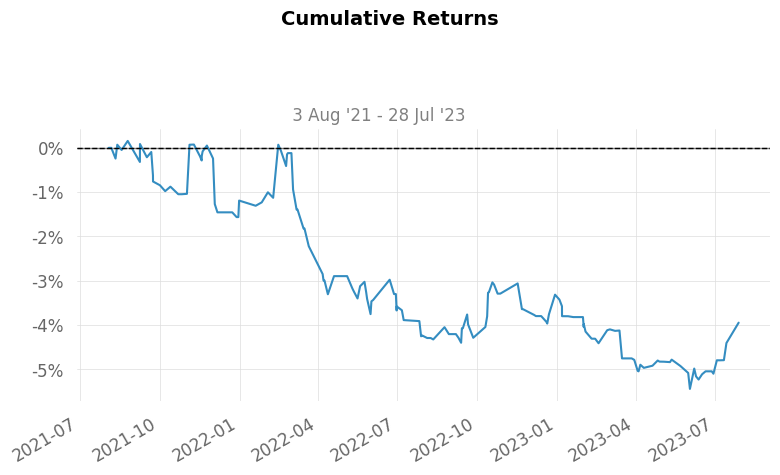

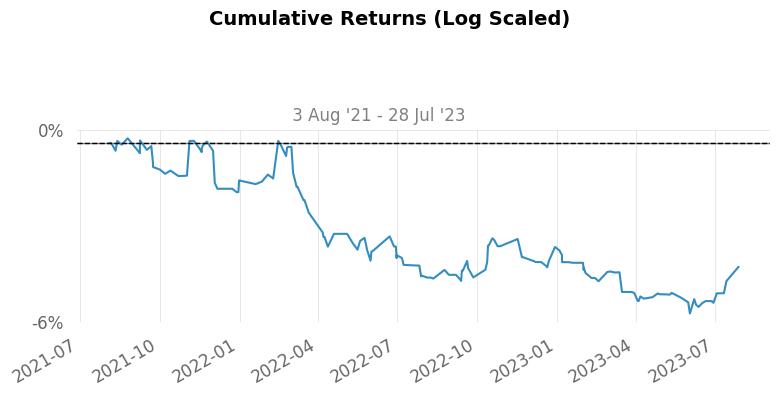

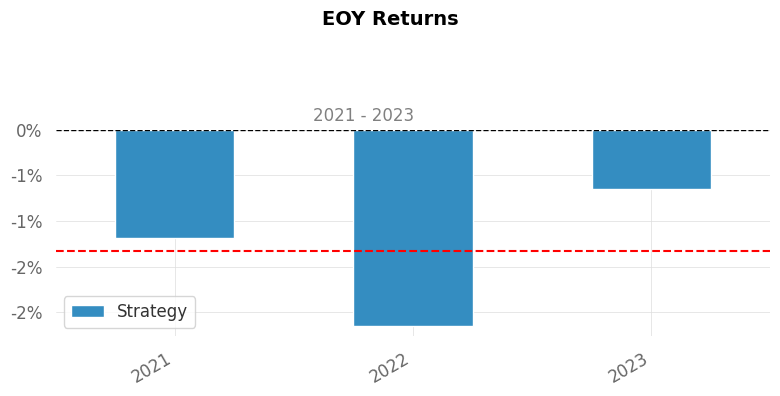

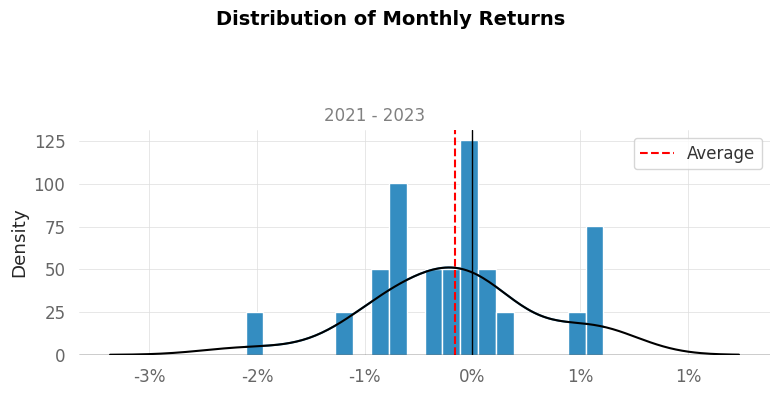

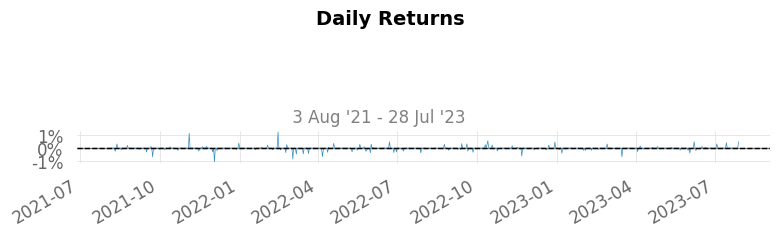

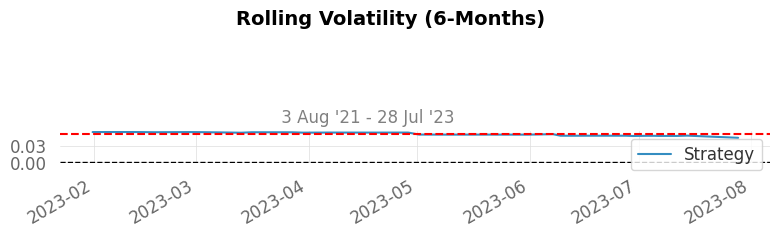

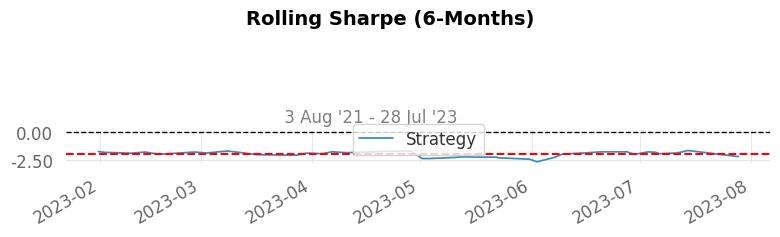

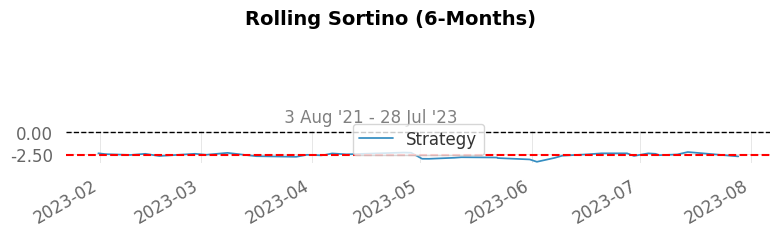

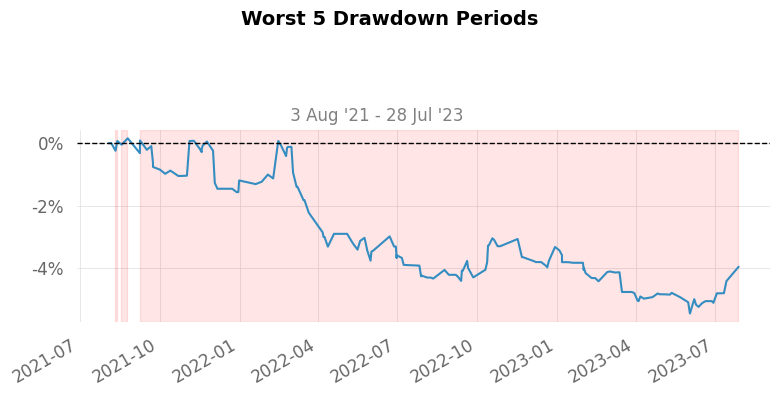

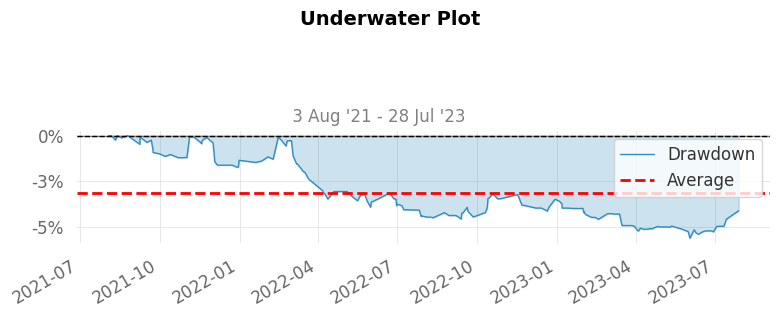

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


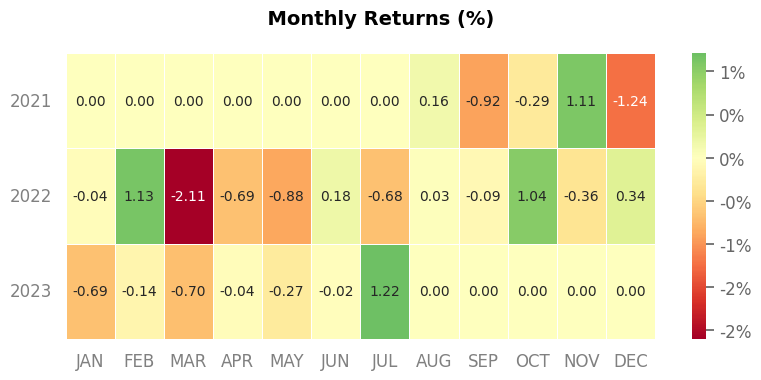

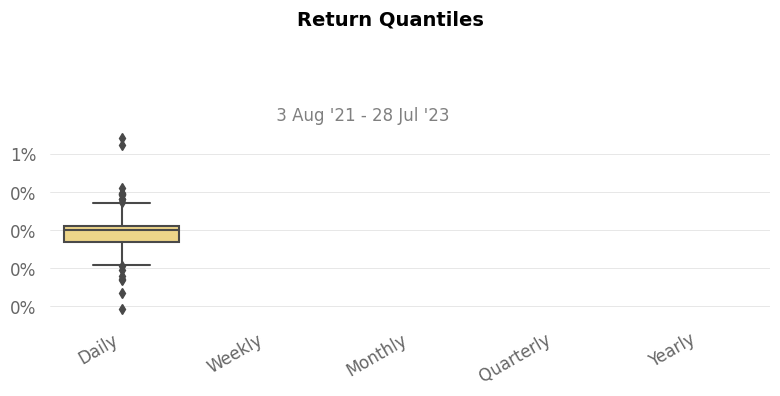

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True)

## Order History

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 1f880fd2e403430d9dfaad5e362570d1 |
| Transaction Type | SELL                             |
| Instrument       | NASDAQ:NFLX                      |
| Quantity         | 4                                |
| Price            | $426.63                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-12-01T16:58:23.077453Z | COMPLETE               |
| 2023-12-01T16:58:23.077437Z | OPEN                   |
| 2023-12-01T16:58:23.077418Z | OPEN PENDING           |
| 2023-12-01T16:58:23.077398Z | VALIDATION PENDING     |
| 2023-12-01T16:58:23.077353Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | 100d68162f47496b9

## Papertrading

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:NFLX', 
    lots=5,
    parameters=parameters, 
    candle='1 minute'
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/).

### Start

In [ ]:
broking_details = {
    'brokerName': 'ALPACA LIVE',
    'credentialParameters': {}
}

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:NFLX', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)